In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [3]:
request_reply_df.describe()

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
count,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,...,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000,12300.000000
mean,168.552801,80.671077,38.756572,32.053867,30.741587,29.762200,29.199574,27.477508,26.854041,25.994097,...,25.061934,25.304607,25.449759,25.352015,25.144316,25.101272,26.139811,26.930865,28.847339,33.734174
std,143.484703,139.634386,124.942185,115.652077,108.482573,103.805790,114.714679,104.206368,100.228591,97.246000,...,103.891678,103.689839,104.585712,104.140811,105.343442,105.831126,108.482392,113.407518,149.541268,157.315308
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,110.203981,10.664463,7.254362,6.472051,6.865978,6.719649,6.819010,6.800115,6.838262,6.684005,...,6.622315,6.737947,6.783962,6.749630,6.704092,6.692827,6.615638,6.826102,6.601989,6.671906
50%,125.361919,27.813911,11.111021,9.940505,10.165453,10.082960,10.182023,10.108947,10.139465,10.075569,...,10.021448,10.118008,10.111928,10.084033,10.094404,10.052443,10.025501,10.061979,10.042549,10.014534
75%,216.209472,114.264309,19.995451,15.584529,15.759706,15.511990,15.537262,15.574992,15.710831,15.468359,...,15.242099,15.369892,15.529871,15.397132,15.461623,15.429079,15.504480,15.425980,15.324474,15.388250
max,5317.913055,5216.073036,5111.930847,5008.516073,4904.536963,4800.885916,6366.826057,6265.555143,6161.940098,6053.858995,...,8872.637033,8973.212957,9074.537039,9175.518036,9275.300026,9375.156164,9476.207972,9576.614857,9934.896946,10035.484076


In [4]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [ ]:
request_reply_df["Malicious"].replace('legit', 0, inplace=True)
request_reply_df["Malicious"].replace('malware', 1, inplace=True)

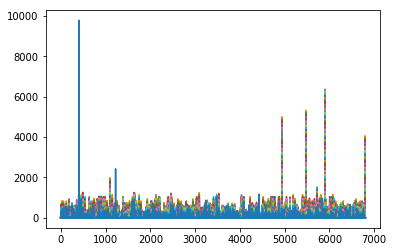

In [ ]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

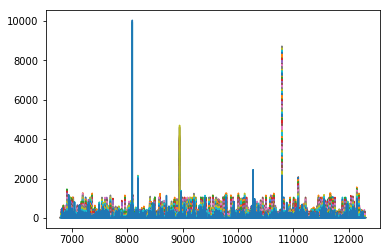

In [ ]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [ ]:
from prototype_model import *

In [ ]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

W0920 07:54:39.174213 4520814016 base_layer.py:1772] Layer sequential is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/20


W0920 07:54:40.207420 4520814016 deprecation.py:323] From /Users/egalinkin/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


941/941 [==============================] - 8s 9ms/step - loss: 1.5088 - accuracy: 0.5214 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
941/941 [==============================] - 5s 5ms/step - loss: 0.8182 - accuracy: 0.5623 - val_loss: 0.7451 - val_accuracy: 0.5688
Epoch 3/20
941/941 [==============================] - 5s 5ms/step - loss: 0.7175 - accuracy: 0.5932 - val_loss: 0.7002 - val_accuracy: 0.5650
Epoch 4/20
941/941 [==============================] - 5s 5ms/step - loss: 0.6577 - accuracy: 0.6162 - val_loss: 0.7147 - val_accuracy: 0.5612
Epoch 5/20
941/941 [==============================] - 5s 5ms/step - loss: 0.6585 - accuracy: 0.6313 - val_loss: 0.6863 - val_accuracy: 0.5908
Epoch 6/20
941/941 [==============================] - 5s 5ms/step - loss: 0.6195 - accuracy: 0.6592 - val_loss: 0.7309 - val_accuracy: 0.6052
Epoch 7/20
941/941 [==============================] - 5s 5ms/step - loss: 0.6198 - accuracy: 0.6679 - val_loss: 0.7146 - val_accuracy: 0.6071
Epoch 8/2

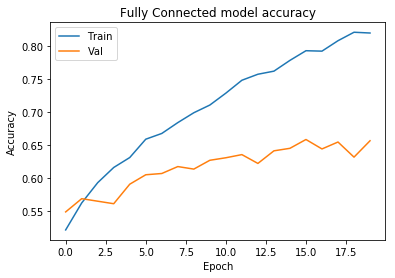

In [ ]:
plt.plot(fc_qr_history.history['accuracy'])
plt.plot(fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(reply_reply_df)
model = build_fc_model(features)
fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

W0920 07:56:21.527021 4520814016 base_layer.py:1772] Layer sequential_1 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/20
941/941 [==============================] - 8s 9ms/step - loss: 1.5010 - accuracy: 0.5177 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
941/941 [==============================] - 5s 5ms/step - loss: 0.7529 - accuracy: 0.5276 - val_loss: 0.7231 - val_accuracy: 0.5650
Epoch 3/20


In [ ]:
plt.plot(fc_rr_history.history['accuracy'])
plt.plot(fc_rr_history.history['val_accuracy'])
plt.title('Fully Connected model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

In [ ]:
plt.plot(conv_qr_history.history['accuracy'])
plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(reply_reply_df)
model = build_conv_model(features)
conv_rr_history, conv_rr_results = train_model(model, reply_reply_df)

In [ ]:
plt.plot(conv_rr_history.history['accuracy'])
plt.plot(conv_rr_history.history['val_accuracy'])
plt.title('Convolutional model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dataset = reply_reply_df.copy()
dataset.drop('1', axis=1, inplace=True)
labels = dataset.pop("0")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.15)

In [ ]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(accuracy))

In [ ]:
features = generate_features(request_reply_fourier)
model = build_fc_model(features)
fourier_fc_qr_history, fourier_fc_qr_results = train_model(model, request_reply_fourier)

In [ ]:
plt.plot(fourier_fc_qr_history.history['accuracy'])
plt.plot(fourier_fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected Fourier model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(request_reply_fourier)
model = build_conv_model(features)
fourier_conv_qr_history, fourier_conv_qr_results = train_model(model, request_reply_fourier)

In [ ]:
plt.plot(fourier_conv_qr_history.history['accuracy'])
plt.plot(fourier_conv_qr_history.history['val_accuracy'])
plt.title('Convolutional Fourier model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
features = generate_features(request_reply_wavelet)
model = build_fc_model(features)
wavelet_fc_qr_history, wavelet_fc_qr_results = train_model(model, request_reply_wavelet)

In [ ]:
# plt.plot(wavelet_fc_qr_history.history['accuracy'])
# plt.plot(wavelet_fc_qr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
# features = generate_features(reply_reply_wavelet)
# model = build_fc_model(features)
# wavelet_fc_rr_history, wavelet_fc_rr_results = train_model(model, reply_reply_wavelet)

In [ ]:
# plt.plot(wavelet_fc_rr_history.history['accuracy'])
# plt.plot(wavelet_fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
# features = generate_features(request_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_qr_history, wavelet_conv_qr_results = train_model(model, request_reply_wavelet)

In [ ]:
# plt.plot(wavelet_conv_qr_history.history['accuracy'])
# plt.plot(wavelet_conv_qr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
# features = generate_features(reply_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_rr_history, wavelet_conv_rr_results = train_model(model, reply_reply_wavelet)

In [ ]:
# plt.plot(wavelet_conv_rr_history.history['accuracy'])
# plt.plot(wavelet_conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
print("==================================================")
print("=                Overall results                ==")
print("==================================================")
print("    *Request-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_qr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_qr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_qr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_qr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_qr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_qr_results[1]))
print("    Random Forest (control) test accuracy: {}".format(accuracy))
print("    *Reply-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_rr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_rr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_rr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_rr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_rr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_rr_results[1]))